In [10]:
import os

import steamreviews as sr
from openai import OpenAI
import cache_magic

HOUSE_FLIPPER_GAME_ID = "1190970"

In [18]:
request_params = {}
request_params['review_type'] = 'negative'
request_params['purchase_type'] = 'steam'

sr.download_reviews_for_app_id_batch([HOUSE_FLIPPER_GAME_ID], chosen_request_params=request_params)

Loading idprocessed_on_20231218.txt
[appID = 1190970] expected #reviews = 366
[appID = 1190970] num_reviews = 366 (expected: 366)
Game records written: 1


True

In [11]:
reviews = sr.load_review_dict(HOUSE_FLIPPER_GAME_ID)

In [13]:
api_key = os.environ.get("OPENAI_API_KEY")

In [ ]:
client = OpenAI(
    # This is the default and can be omitted
    api_key=os.environ.get("OPENAI_API_KEY"),
)
reasons = []
for i, r in enumerate(reviews['reviews'].items()):
    review = r[1]['review']
    reason = client.chat.completions.create(
    messages=[
        {
        "role": "user",
        "content": f"Review: Analyze the following Steam review for the game House Flipper 2. Categorize the review based on the primary reason for a negative experience. Answer only using following words: bug, missing feature, performance. If it's other reason, write just caterogry in format: other - <calculated category>. Review: #{review}",
        }
    ],
    model="gpt-4-1106-preview"
    )
    reason = reason.choices[0].message.content
    reasons.append((r[0], reason))
    if 'other' in reason:
        print(i, reason, review)
    else:
        print(i, reason)
%cache saved_reasons = reasons

loading cached value for variable 'saved_reasons'. Time since pickling  0:08:02.870817


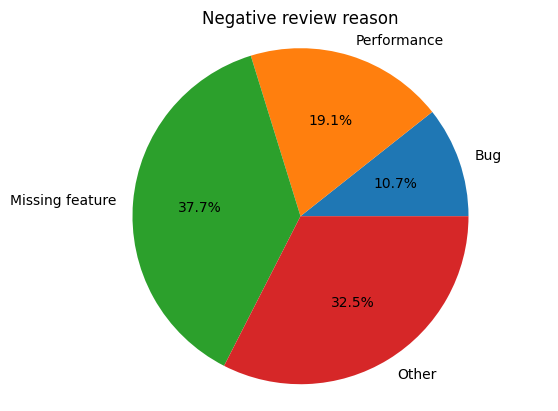

In [21]:
# import numpy as np
import matplotlib.pyplot as plt

%cache saved_reasons
%matplotlib inline

labels = ['Bug', 'Performance', 'Missing feature', 'Other']
bug, perf, miss, other = 0, 0, 0, 0
for r in saved_reasons:
    match r[1]:
        case 'missing feature':
            miss += 1
        case 'performance':
            perf += 1
        case 'bug':
            bug += 1
        case _:
            other += 1

fig, ax = plt.subplots()
ax.pie([bug, perf, miss, other], labels=labels, autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Negative review reason')

plt.show()